In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = pd.read_csv("datasets/dataset_clean.csv")

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)

dataset.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,problemas relacionados con facilidades de aten...,11,bogotá,juridica,escrito,pqr,peticion directa,reclamo,0,trim i
1,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,problemas relacionados con facilidades de aten...,76,cali,natural,telefonico,pqr,0,reclamo,0,trim i
2,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,problemas relacionados con facilidades de aten...,41,neiva,natural,personalizado,pqr,0,reclamo,0,trim i
3,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,epilepsia,66,dosquebradas,natural,personalizado,pqr,0,reclamo,1,trim i
4,bogota d.c.,de 13 a 17 años,ninguno,hombre,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,problemas relacionados con facilidades de aten...,11,bogotá,juridica,escrito,pqr,peticion directa,reclamo,0,trim i


## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

In [2]:
encoded_features = data_utils.encode_features(features, labels)
display(encoded_features.head(n = 5))  


--- 220.64018201828003 seconds ---


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PATOLOGIA_1,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,TRIM
0,0.413632,0.457947,0.404291,0.422006,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.388499,0.388499,0.416195,0.420014,0.271184,0.168226,0.457652,0.266635,0.456139,0.4024
1,0.367341,0.457947,0.447575,0.455866,0.43569,0.371084,0.459542,0.425020,0.420733,0.436371,...,0.388499,0.388499,0.375220,0.366720,0.433927,0.281359,0.457652,0.459141,0.456139,0.4024
2,0.557791,0.457947,0.488072,0.455866,0.43569,0.564257,0.532725,0.425020,0.420733,0.436371,...,0.388499,0.388499,0.549517,0.558897,0.433927,0.616036,0.457652,0.459141,0.456139,0.4024
3,0.409106,0.457947,0.404291,0.455866,0.43569,0.445723,0.532725,0.526102,0.420733,0.436371,...,0.450952,0.450952,0.407647,0.447220,0.433927,0.616036,0.457652,0.459141,0.456139,0.4024
4,0.413632,0.457947,0.404291,0.455866,0.43569,0.411426,0.498799,0.425020,0.488333,0.436371,...,0.388499,0.388499,0.416195,0.420014,0.271184,0.168226,0.457652,0.266635,0.456139,0.4024


## Store processed dataset

In [3]:
encoded_features['RIESGO_VIDA'] = labels

encoded_features.to_csv("datasets/encoded_dataset.csv", index = False)

## Post Processing Exploration

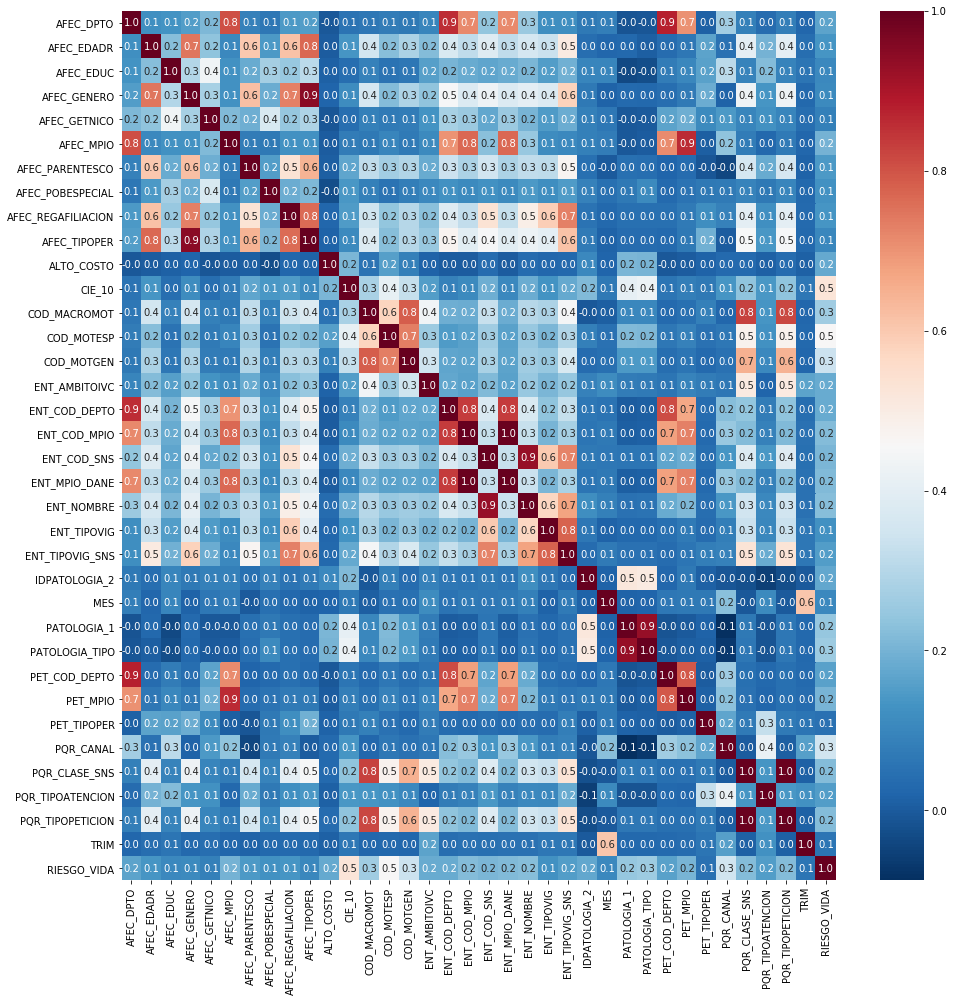

In [4]:
import seaborn as sns
plt.figure(figsize=(16, 16))

ax = sns.heatmap(encoded_features.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')